In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('CrudeOil.csv')

In [3]:
data.isnull().any()

Date         True
Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [4]:
data.isnull().sum()

Date         3141
Open         3141
High         3141
Low          3141
Close        3141
Adj Close    3141
Volume       3141
dtype: int64

In [5]:
data.dropna(axis=0,inplace=True)

In [6]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
data_oil=data.reset_index()['Close']
data_oil

0       108.43
1       105.76
2       109.78
3       111.76
4       109.57
         ...  
1883     48.79
1884     48.65
1885     47.93
1886     50.04
1887     52.69
Name: Close, Length: 1888, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

In [11]:
data_oil

array([[0.90534928],
       [0.88879936],
       [0.91371723],
       ...,
       [0.53034154],
       [0.54342032],
       [0.55984628]])

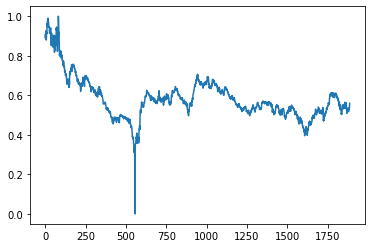

In [12]:
plt.plot(data_oil)

In [13]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [14]:
training_size,test_size

(1227, 661)

In [15]:
train_data.shape

(1227, 1)

In [16]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [17]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [18]:
print(x_train.shape),print(y_train.shape)

(1216, 10)
(1216,)


(None, None)

In [19]:
print(x_test.shape),print(y_test.shape)

(650, 10)
(650,)


(None, None)

In [20]:
x_train

array([[0.90534928, 0.88879936, 0.91371723, ..., 0.8914647 , 0.9191099 ,
        0.91675448],
       [0.88879936, 0.91371723, 0.92599021, ..., 0.9191099 , 0.91675448,
        0.91235356],
       [0.91371723, 0.92599021, 0.91241555, ..., 0.91675448, 0.91235356,
        0.96212732],
       ...,
       [0.52755222, 0.53753177, 0.53796566, ..., 0.52110581, 0.52191161,
        0.52996963],
       [0.53753177, 0.53796566, 0.53486642, ..., 0.52191161, 0.52996963,
        0.5272423 ],
       [0.53796566, 0.53486642, 0.52637451, ..., 0.52996963, 0.5272423 ,
        0.5333168 ]])

In [21]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()

In [24]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

In [25]:
model.add(Dense(1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3,batch_size=64,verbose=1)

Epoch 1/3
19/19 [==============================] - 7s 91ms/step - loss: 0.1069 - val_loss: 0.0014
Epoch 2/3
19/19 [==============================] - 0s 22ms/step - loss: 0.0094 - val_loss: 0.0082
Epoch 3/3
19/19 [==============================] - 0s 23ms/step - loss: 0.0035 - val_loss: 0.0042


In [29]:
train_predict=scaler.inverse_transform(train_data) 
test_predict=scaler.inverse_transform(test_data)
### Calculate RMSE performance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_data,train_predict))

63.83357795294612

In [30]:
from tensorflow.keras.models import load_model

In [31]:
model.save("crude.hs")

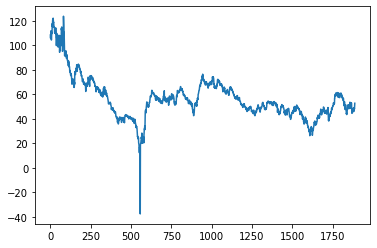

In [32]:
look_back=10
trainpredictPlot = np.empty_like(data_oil)
trainpredictPlot[:, :]= np.nan
trainpredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictplot = np.empty_like(data_oil)
testPredictplot[:,: ] = np.nan
testPredictplot[look_back:len(test_predict)+look_back, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_oil))
plt.show()

In [33]:
len(test_data)

661

In [38]:
x_input=test_data[660:].reshape(1,-1)
x_input.shape

(1, 1)

In [39]:
temp_input=list(x_input) 
temp_input=temp_input[0].tolist()

In [40]:
temp_input

[0.5598462778156573]

In [44]:
lst_output=[]
n_steps=1
i=0
while(i<1):
    if(len(temp_input)>1):
#print(temp_input)
       x_input=np.array(temp_input[1:]) 
       print("{} day input {}".format(i,x_input))
       x_input=x_input.reshape(1,-1)
       x_input = x_input.reshape((1, n_steps, 1)) #print(x_input)
       yhat = model.predict(x_input, verbose=0)
       print("{} day output {}".format(i,yhat))
       temp_input.extend(yhat[0].tolist())
       temp_input=temp_input[1:] #print(temp_input)
       lst_output.extend(yhat.tolist())
       i=i+1
    else:
       x_input = x_input.reshape((1, n_steps,))
       yhat = model.predict(x_input, verbose=0)
       print(yhat[0])
       temp_input.extend(yhat[0].tolist()) 
       print(len(temp_input))
       lst_output.extend(yhat.tolist())
       i=i+1

[0.05684005]
2
